In [2]:
import numpy as np
from scipy import signal
import pywt

import sys
sys.path.append('..')
from ekg.audicor_reader import reader

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# load data
X = np.load('../data/cleaned_2_patient_X.npy')

In [4]:
X.shape

(754, 10, 10000)

In [5]:
sig = X[1, 9, :]

In [42]:
signal, sampling_rate = reader.get_ekg('/home/toosyou/ext_ssd/Cardiology/交大-normal/大檢查audicor/NOR001/PP-01_000708.bin',
                                        do_bandpass_filter=True, filter_lowcut=30, filter_highcut=250)

In [43]:
signal.shape

(10, 10000)

In [132]:
sig = signal[8, :]

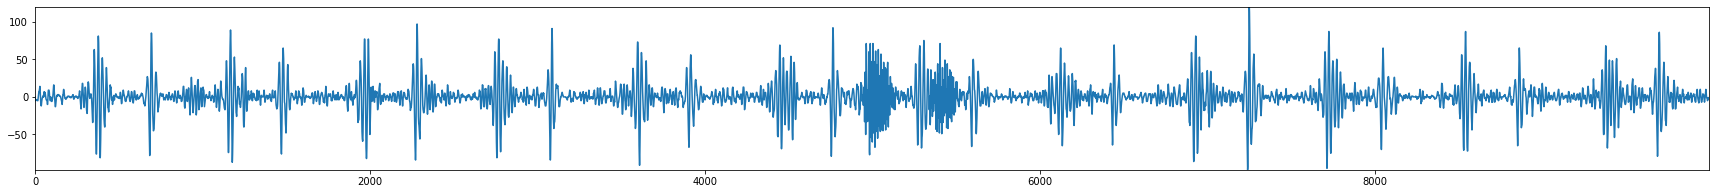

In [133]:
plt.figure(figsize=(30, 3))
plt.plot(sig)
plt.margins(x=0, y=0)

In [98]:
coef, freqs = pywt.cwt(sig,np.arange(1, 45, 0.1), 'cgau5', sampling_period=1/1000)

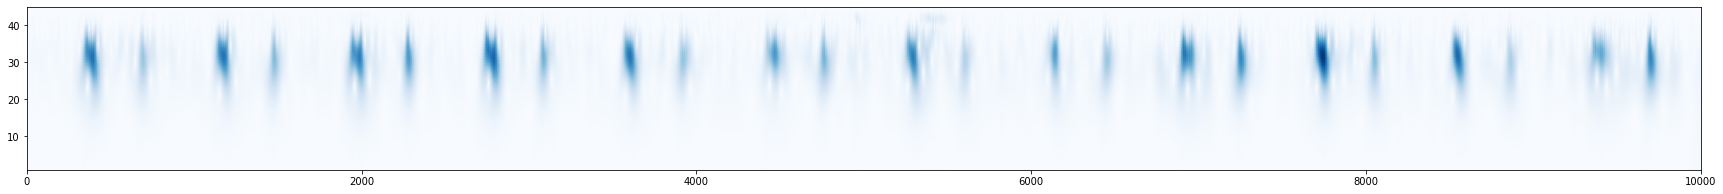

In [99]:
plt.figure(figsize=(30, 3))
plt.imshow(np.abs(coef), aspect='auto', cmap='Blues', extent=[0, 10000, 1, 45])
plt.show()

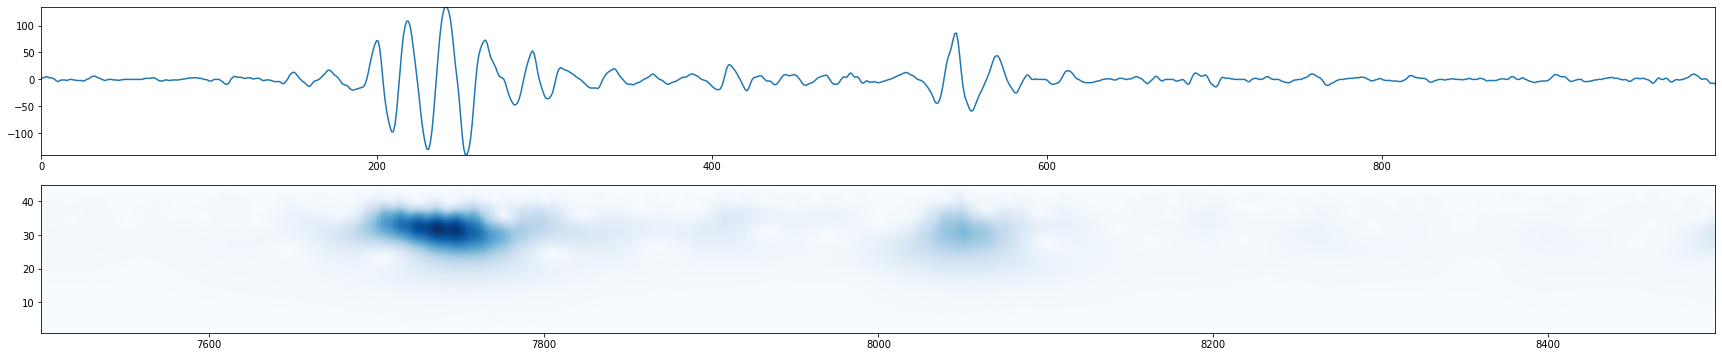

In [100]:
plt.figure(figsize=(30, 6))

start = 7500
end = 8500
seg = np.s_[start: end]

plt.subplot(2, 1, 1)
plt.plot(sig[seg])
plt.margins(x=0, y=0)

plt.subplot(2, 1, 2)
plt.imshow(np.abs(coef)[:, seg], aspect='auto', cmap='Blues', extent=[start, end, 1, 45])
plt.show()

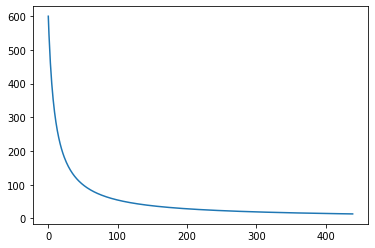

In [101]:
plt.plot(freqs)

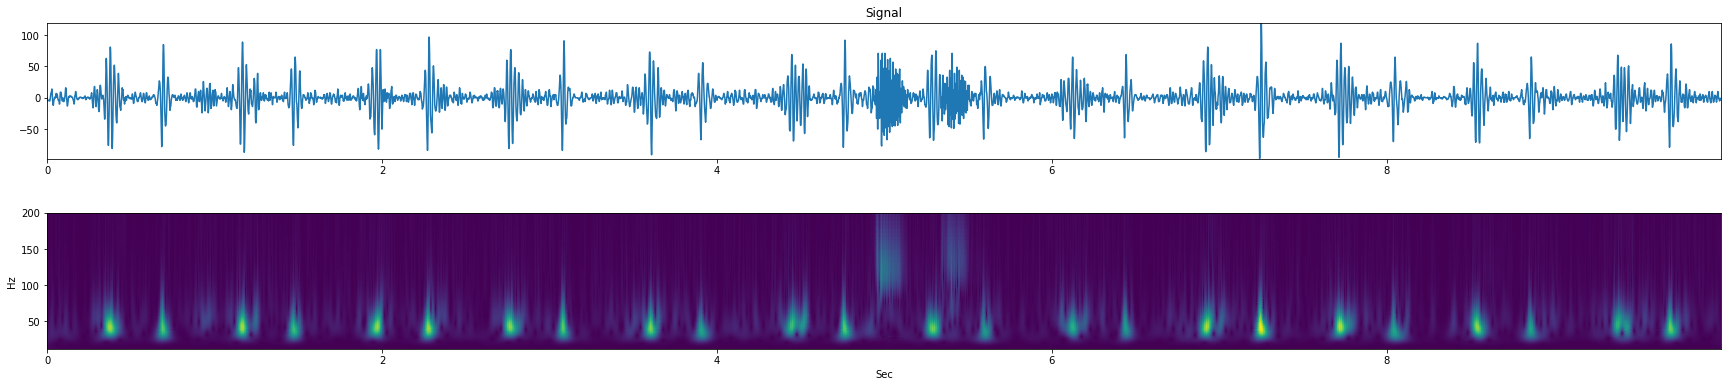

In [139]:
t = np.arange(0, 10, 1.0 / 1000)

data = sig
wavename = 'cgau5'
# totalscal = 50
# fc = pywt.central_frequency(wavename)
# cparam = 2 * fc * totalscal
# scales = cparam / np.arange(totalscal, 1, -1)

scales = np.arange(3, 50, 0.1)
[cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / 1000)

plt.figure(figsize=(30, 6))
plt.subplot(211)
plt.plot(t, data)
plt.title("Signal")
plt.margins(x=0, y=0)

plt.subplot(212)
plt.pcolormesh(t, frequencies, abs(cwtmatr))
plt.ylabel("Hz")
plt.xlabel("Sec")
plt.subplots_adjust(hspace=0.4)
plt.margins(x=0, y=0)

plt.show()